/home/skelly/school/exoplanets/microlensing/env/lib/python3.12/site-packages/MulensModel/model.py:267: UserWarning: No blend_flux not specified. Assuming blend_flux = zero.
  warnings.warn(
/home/skelly/school/exoplanets/microlensing/env/lib/python3.12/site-packages/MulensModel/magnificationcurve.py:195: UserWarning: A finite source parameter (rho or t_star) is set and no finite-source method is set.
For possible magnification methods see
/home/skelly/school/exoplanets/microlensing/env/lib/python3.12/site-packages/MulensModel/documents/magnification_methods.pdf
or
https://github.com/rpoleski/MulensModel/blob/master/documents/magnification_methods.pdf
  warnings.warn(msg, UserWarning)


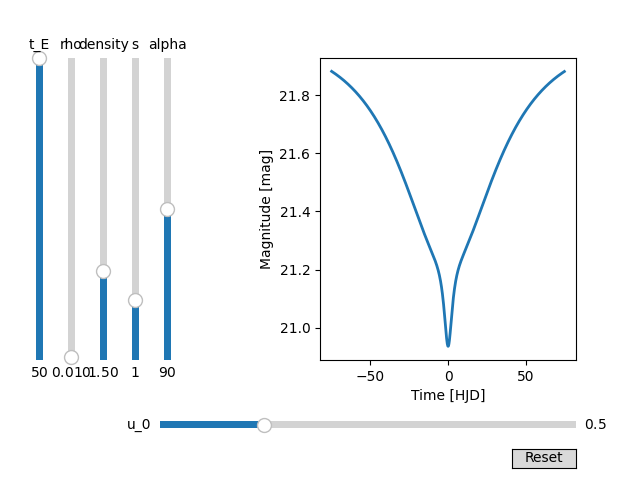

In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import MulensModel as mm

from matplotlib.widgets import Button, Slider
from param_utils import Param, Params

def get_curve(args):
    my_1S2L_model = mm.Model({'t_0': 0, 'u_0': args[0],
                              't_E': args[1], 'rho': args[2], 'q': args[3], 's': args[4],
                              'alpha': args[5]})
    times = my_1S2L_model.set_times()
    lc = my_1S2L_model.get_lc(source_flux=1)
    return times, lc

# Create the figure and the line that we will manipulate
params = Params()
fig, ax = plt.subplots()
line, = ax.plot(get_curve(params.get_inits())[0], get_curve(params.get_inits())[1], lw=2)
ax.set_xlabel('Time [HJD]')
ax.set_ylabel('Magnitude [mag]')
# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.5, bottom=0.25)

# Make a horizontal slider to control the u0.
axu0 = fig.add_axes([0.25, 0.1, 0.65, 0.03])
u0_slider = Slider(
    ax=axu0,
    label='u_0',
    valmin=params.u_0.min,
    valmax=params.u_0.max,
    valinit=params.u_0.init,
)

# Make a vertically oriented slider to control the rho
axrho = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
rho_slider = Slider(
    ax=axrho,
    label="rho",
    valmin=params.rho.min,
    valmax=params.rho.max,
    valinit=params.rho.init,
    orientation="vertical"
)

axtE = fig.add_axes([0.05, 0.25, 0.0225, 0.63])
tE_slider = Slider(
    ax=axtE,
    label="t_E",
    valmin=params.t_E.min,
    valmax=params.t_E.max,
    valinit=params.t_E.init,
    orientation="vertical"
)

axd = fig.add_axes([0.15, 0.25, 0.0225, 0.63])
d_slider = Slider(
    ax=axd,
    label="density",
    valmin=params.density.min,
    valmax=params.density.max,
    valinit=params.density.init,
    orientation="vertical"
)

axs = fig.add_axes([0.2, 0.25, 0.0225, 0.63])
s_slider = Slider(
    ax=axs,
    label="s",
    valmin=params.s.min,
    valmax=params.s.max,
    valinit=params.s.init,
    orientation="vertical"
)

axalph = fig.add_axes([0.25, 0.25, 0.0225, 0.63])
alph_slider = Slider(
    ax=axalph,
    label="alpha",
    valmin=params.alpha.min,
    valmax=params.alpha.max,
    valinit=params.alpha.init,
    orientation="vertical"
)

# The function to be called anytime a slider's value changes
def update(val):
    args = get_curve(params.get_inits())[1]
    args[0] = u0_slider.val
    args[1] = tE_slider.val
    args[2] = rho_slider.val
    args[3] = d_slider.val * rho_slider.val
    args[4] = s_slider.val
    args[5] = alph_slider.val

    print(args)
    
    x, y = get_curve(args)
    line.set_ydata(y)
    line.set_xdata(x)
    ax.set_ylim(y.min(), y.max())
    ax.set_xlim(x.min(), x.max())
    fig.canvas.draw_idle()


# register the update function with each slider
u0_slider.on_changed(update)
rho_slider.on_changed(update)
tE_slider.on_changed(update)
d_slider.on_changed(update)
s_slider.on_changed(update)
alph_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    u0_slider.reset()
    rho_slider.reset()
    tE_slider.reset()
    d_slider.reset()
    s_slider.reset()
    alph_slider.reset()

button.on_clicked(reset)

plt.show()